In [1]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
import signac


In [2]:
project = signac.get_project()
jobs = list(project.find_jobs(filter={'doc.equli': True}))
len(jobs)

9

In [3]:
from grits import CG_System
import ele
# coarse grain the UA trajectories
conv_dict = {
    "ca": ele.element_from_symbol("C"),
    "s": ele.element_from_symbol("S"),
    "sh": ele.element_from_symbol("S"),
}
pps_bead = {'_A': "c1ccc(S)cc1"}
for job in jobs:
    ua_gsd = job.fn("trajectory.gsd")

    system = CG_System(
        ua_gsd,
        beads = pps_bead,
        conversion_dict=conv_dict,
        add_hydrogens = True
    )
    system.save(job.fn("cg_trajectory.gsd"))

/home/marjanalbooyeh/miniconda3/envs/anisoML/lib/python3.11/site-packages/mdtraj/formats/__init__.py:6: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from .xtc import XTCTrajectoryFile
/home/marjanalbooyeh/miniconda3/envs/anisoML/lib/python3.11/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/home/marjanalbooyeh/miniconda3/envs/anisoML/lib/python3.11/site-packages/pkg_resources/__init__.py:2868: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/marjanalbooyeh/miniconda3/envs/anisoML/lib/python3.11/site-packages/lark/utils.py:

Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.
Added 6 hydrogens.


In [4]:
kT_range = [job.sp.kT for job in jobs]
kT_range.sort()

In [5]:
kT_range

[0.1, 0.5, 0.75, 1.0, 2.0, 4.0, 6.0, 7.0, 9.0]

In [6]:
color = cm.rainbow(np.linspace(0, 1, len(kT_range)))

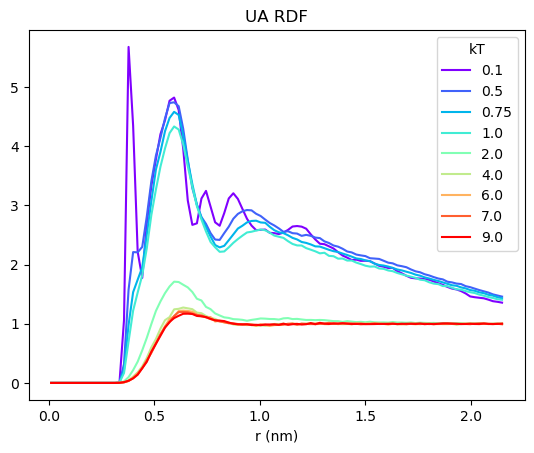

In [13]:
idx = -300
import gsd.hoomd
from cmeutils.structure import gsd_rdf
for i, kT in enumerate(kT_range):
    job = list(project.find_jobs(filter={'kT': kT, 'doc.equli':True}))[0]
    traj_gsd = job.fn("cg_trajectory.gsd")
    rdf, rdf_norm = gsd_rdf(gsdfile=traj_gsd, A_name="_A", B_name="_A",r_max=6, start=idx, stop=-1)
    plt.plot(rdf.bin_centers * 0.36, rdf.rdf * rdf_norm, label=kT, c=color[i])
plt.legend(title="kT", bbox_to_anchor=(1., 1.))
plt.xlabel("r (nm)")
plt.title("UA RDF")
plt.savefig("UA_RDF.png")

In [9]:
import gsd.hoomd
traj = gsd.hoomd.open(traj_gsd)
len(traj)

411

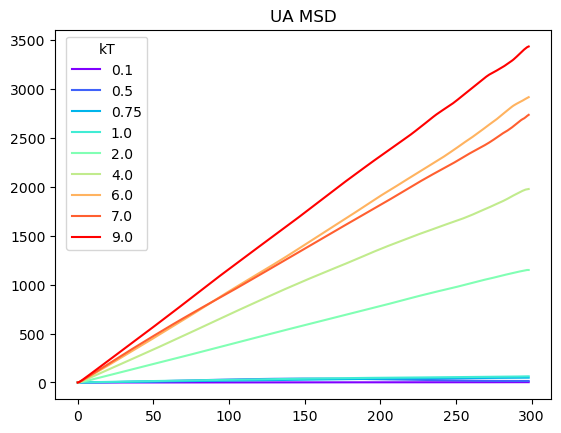

In [20]:
from cmeutils.dynamics import msd_from_gsd
import matplotlib.pyplot as plt
for i, kT in enumerate(kT_range):
    job = list(project.find_jobs(filter={'kT': kT, 'doc.equli':True}))[0]
    traj_gsd = job.fn("cg_trajectory.gsd")
    msd = msd_from_gsd(gsdfile=traj_gsd, start=idx)
    plt.plot(msd.msd, label=kT, c=color[i])
plt.legend(title='kT', bbox_to_anchor=(0.2, 1.)) 
plt.title("UA MSD")
plt.savefig("UA_MSD.png")